## Assignment 4 - Text Analysis

이번 과제에서는 주어진 텍스트를 분석하여 워드클라우드 그래프를 그린다.

* 학번: 2021-17864
* 학과: 언론정보학과
* 이름: 안민규

### Dataset

주어진 데이터는 네이버에서 크롤링한 영화평이다.

데이터는 다음과 같이 구성되어 있다.

```
id	document	label
2190435	사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화	1
9279041	완전 감동입니다 다시봐도 감동	1
7865729	개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음	1
...
9327892	타임 루프 소재중 거의 최악. 감독과 작가부터 자기 반성의 시간을 갖자	0
9953525	이쪽 저쪽 ...어디서 본듯한...내용이 뒤죽박죽 순수창작물인지?	0
7744648	전기세가 아까운 영화!	0
```

데이터를 보면 알 수 있듯이 긍정적인 평은 label이 1,
부정적인 평은 label 이 0이다.



In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 51.1 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data1 = pd.read_csv('/content/drive/MyDrive/데저널/twitter_positive.csv')
data2 = pd.read_csv('/content/drive/MyDrive/데저널/twitter_negative.csv')

In [3]:
from konlpy.tag import Okt
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
tagger = Okt()

In [ ]:
pos_lines = []
for i in range(len(data1.comment)):
    pos_lines.append(data1.comment[i])
pos_lines

['@MMoong_CM 열바더 ㅇ아오 아...아니근데 무색무취 이거너무그...하.....ㅅㅂ고결하고무결한인간상을원했다 이남자야..........  코박고체향맡아보고시퍼 비누냄새날까싶긴해 퍼펙트자기관리의남자',
 '@:에타에서 화장하는 남자 어떻다저떻다 싸움 낫는데 일침 개웃김ㅠㅠ https://t.co/mbmsZNnFmG',
 '머리가 길면 관리하는데 손이 갈 수밖에 없는데, 다른 전사분들은 남자신데도 그런 자기관리에 소홀하지 않으신가 봐요. 흐트러진 때를 별로 못 봤거든요. 특히 브레이즈님의 머리카락은 항상 윤기나는 예쁜 은발이셔서 감탄이 나와요. 조금 부럽기도 하구요.',
 '그리고 유즈루가 화장도 할 줄 안다는것도,,\n이 완벽한 남자 어쩔거야ㅠ https://t.co/IUzE7hRJI9',
 '놀이공원에 교복 입고 놀러간 바이브야 좋다..\n\n교복입고 화장 연하게한거 너무 좋아\n한쪽 입꼬리만 올리고 찍어서 장난스런 느낌나서 좋고 \n머리 약간 반깐이라 남자같아서 좋아 https://t.co/miaqRbNFgK',
 '내 취향의 남자 오탁후를 찾았다\n이분만 파야지....화장 심하게 안하는 사람이 체고임',
 '홋 화장한 눈 진짜진짜 좋음....메이크업 안 하면 너무 걍 남자애같은디 또 https://t.co/Q5LaQS0Lhl',
 '아 진짜 이런얼굴을 어떻게 찬양안하냐고요 미쳤어 진짜.. 어떻게 이렇게 말갛고 청순할수가있지ㅠㅠ 남자얼굴이? 아 너무 잘생겼다 미쳤어ㅠㅠㅠㅠㅠㅠㅠㅠㅠ화장기 하나없는 저 얼굴이 사람진짜 돌게함 맨날 하는말인데 남주혁은 독보적입니다 아무나 부비지마세요시발 ㅠㅠ남주혁은 원앤온리!!! https://t.co/vs1smBTmyu',
 '@qqqqqqqqqzzzzz 바코드가 남자얼굴에할수있는화장중 가장아름답고 합법으로 허용된거아니었어? 님잘하고있는거야',
 "서예지, 파격 탱고복+스모키 화장…남자 홀리는 손끝 유혹 ('이브') (출처 : 텐아시아 | 네이버 TV연예) https://t.co/GcAXgzBVmB",
 '미친놈인데 그

In [ ]:
tagged_positive = [tagger.pos(line, norm=True) for line in pos_lines]
tagged_positive

[[('@MMoong_CM', 'ScreenName'),
  ('열', 'Modifier'),
  ('바더', 'Noun'),
  ('ㅇ', 'KoreanParticle'),
  ('아오', 'Exclamation'),
  ('아', 'Exclamation'),
  ('...', 'Punctuation'),
  ('아니', 'Adjective'),
  ('근데', 'Adverb'),
  ('무색', 'Noun'),
  ('무취', 'Noun'),
  ('이', 'Determiner'),
  ('거너', 'Noun'),
  ('무', 'Noun'),
  ('그', 'Determiner'),
  ('...', 'Punctuation'),
  ('하', 'Exclamation'),
  ('.....', 'Punctuation'),
  ('ㅅㅂ', 'KoreanParticle'),
  ('고결하고', 'Adjective'),
  ('무결', 'Noun'),
  ('한', 'Determiner'),
  ('인간', 'Noun'),
  ('상', 'Suffix'),
  ('을', 'Josa'),
  ('원했다', 'Adjective'),
  ('이', 'Determiner'),
  ('남자', 'Noun'),
  ('야', 'Josa'),
  ('..........', 'Punctuation'),
  ('코박', 'Noun'),
  ('고체', 'Noun'),
  ('향', 'Noun'),
  ('맡아', 'Verb'),
  ('보고시퍼', 'Verb'),
  ('비누', 'Noun'),
  ('냄새', 'Noun'),
  ('날까', 'Verb'),
  ('싶긴해', 'Verb'),
  ('퍼펙트', 'Noun'),
  ('자기', 'Noun'),
  ('관리', 'Noun'),
  ('의', 'Josa'),
  ('남자', 'Noun')],
 [('@:', 'Punctuation'),
  ('에타', 'Noun'),
  ('에서', 'Josa'),
  ('화장', '

명사 단어 빈도수
[('남자', 459), ('화장', 372), ('자기', 103), ('관리', 103), ('진짜', 79), ('여자', 61), ('사람', 47), ('생각', 44), ('얼굴', 38), ('사랑', 26), ('그냥', 21), ('웹툰', 19), ('오늘', 18), ('여성', 18), ('우리', 17), ('정말', 17), ('머리', 16), ('하나', 16), ('존나', 16), ('사실', 15), ('운동', 15), ('코르셋', 15), ('보고', 15), ('다른', 14), ('피부', 14), ('사회', 14), ('탈코', 14), ('메이크업', 13), ('지금', 13), ('외모', 13), ('요즘', 13), ('작가', 12), ('치마', 12), ('모습', 12), ('정도', 11), ('자신', 11), ('역시', 10), ('완전', 10), ('친구', 10), ('이번', 10), ('느낌', 9), ('때문', 9), ('인간', 8), ('별로', 8), ('취향', 8), ('사진', 8), ('호감', 8), ('최고', 8), ('위해', 8), ('부분', 8), ('남성', 8), ('금요일', 8), ('작품', 8), ('성별', 8), ('본인', 7), ('어제', 7), ('이야기', 7), ('시대', 7), ('이제', 7), ('현실', 7), ('자체', 7), ('표현', 7), ('얘기', 7), ('목소리', 7), ('소리', 7), ('추천', 7), ('항상', 6), ('네이버', 6), ('기준', 6), ('그것', 6), ('대박', 6), ('최고다', 6), ('완결', 6), ('그게', 6), ('감동', 6), ('해도', 6), ('인생', 6), ('학교', 6), ('아이돌', 6), ('걱정', 6), ('애가', 6), ('그림', 6), ('여자애', 6), ('그거', 6), ('트젠', 6), 

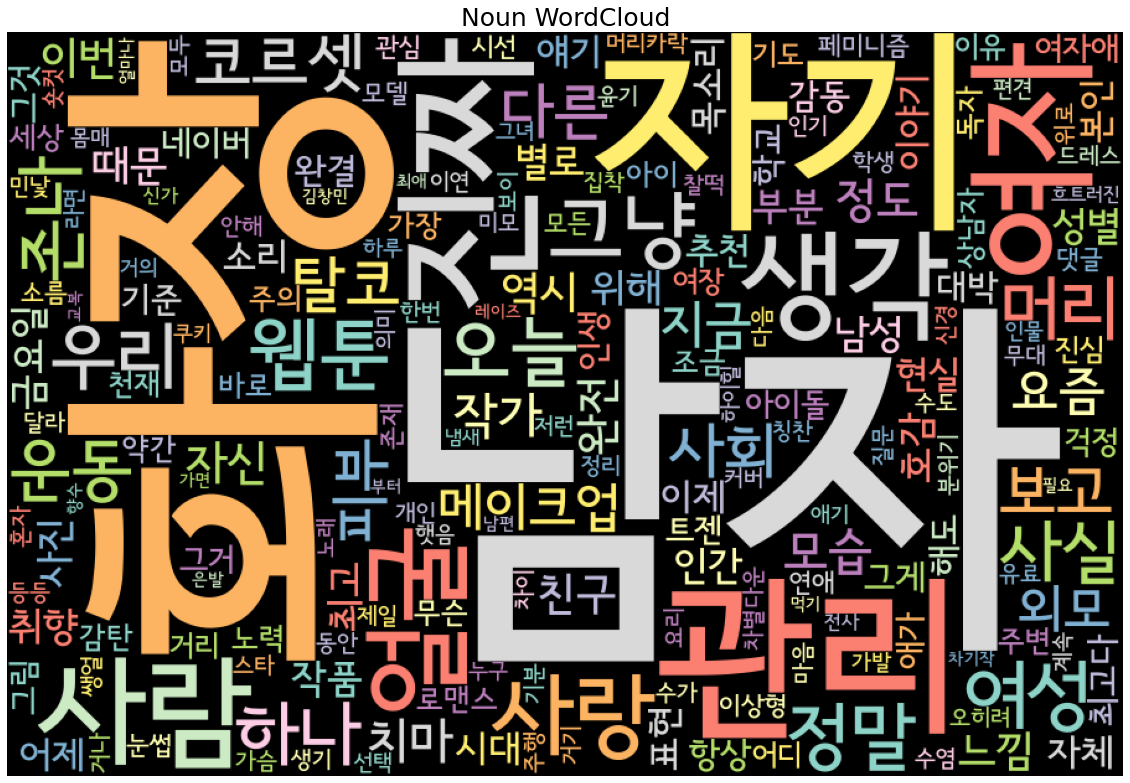

In [ ]:
# 명사 단어 빈도수와 명사 워드클라우드
positive_noun_list = []
for tweet in tagged_positive:    
    for word, tag in tweet:
        if tag in ['Noun']:
            if len(word) > 1:
              positive_noun_list.append(word)
positive_noun_counts = Counter(positive_noun_list)
positive_noun = positive_noun_counts.most_common()
print("명사 단어 빈도수")
print(positive_noun)
print("----------------------------------------------------------------")
positive_noun_cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/데저널/Week8/data/08서울남산체 B.ttf',
                  background_color='black', colormap='Set3')
positive_noun_cloud = positive_noun_cloud.fit_words(positive_noun_counts)
plt.figure(figsize=(20, 25))
plt.axis('off')
plt.title('Noun WordCloud', fontsize=25)
plt.imshow(positive_noun_cloud)
plt.show()

In [ ]:
neg_lines = []
for i in range(len(data2.comment)):
    neg_lines.append(data2.comment[i])
neg_lines

['신떤여자 화장한 남자를 남자로 느끼지못하는이유가 주변 남자들 열이면아홉은 게이라서 그런거같음ㅋ ㅋ ㅋ',
 '노CC에서 여심은 굉장히 예쁜애들이 많은데  남심은...........이래서 남자들이 화장하나',
 '아니씨발 뭐야? 여자화장ㄹ에 남자들어온거같은데;;;',
 '대부분의 남자아이돌이 그렇겠지만 어차피 화장 지워도 잘생긴거 생얼이 더 좋음',
 '의외로여자들..화장한남자봐도 별생각없음 편견있는건남자들이지 진한색조화장얘기.하는거임',
 '퇴근하자마자렌즈도못빼고화장도못지우고총공달리게한남자에스에프나인이처음입니다책임지세요',
 '애두라 요즘 사이비 왤케 무섭냐 ㅆㅂ 화장 다 녹고 개 폐인 상태로 지하철타고 집가는데 어떤 남자가 취향이라고 번호달라는거 거절했는데 계속 따라와서 지금 카페에 10분동안 죽치고 앉아있음 존나 무서워 씨바랄... 5분만 더 기다렸다가 안가면 아빠불러야지 띠발',
 '“아니 산올라가는데 화장을 왜 하냐고-뭐 잘보일 남자라도 있냐?”\n‘뭔소리야~야 남자라고는 딸랑 넷인데 한명은 유부남이고 둘은 여자친구 있고 그리고 한명은 넌데 뭐?’\n“어..”\n[♬]\n-131117',
 '클로에  미쳤다.. 안 그러던 애가 갑자기 저런 화장을... 애기가 남자로 보여요',
 '일월신교 좌사는 얼굴을 망쳐 신분을 감추려 이정도 까지 해버리니까\n\n그러네 이런 고자극으로 무협을 시작했으니 😂\n\n이 홍콩 영화도 김용 무협인가요 😂\n캐붕 왜곡 대잔치\n\n임영영 ㅠㅠ\n진짜 뭘 관계를 꼬아도 이렇게 꼬았어\n숙부랑 조카가 한 남자를 orz\n\n화장씬 최고라고 #어흐흨 \n시시 안타깝다',
 '진짜 최소한의 자기관리, 예를들몃 옷을 못개거나 개인물품 못챙기는 20대초남자들 너무많다고 탄식하는데 100이면 100 스토리가 다양해서 웃겨',
 '김녕빊 어떨 때는 노잼이라 놀리고 싶은데 어떨 땐 오? 웃기네? 한 건 하네? 싶고 화장 해서 그런 거지 민낯은 별로라면서 민낯으로 브이앱 자주 오고 노출에 엄격한가 싶다가도 은근 매무새 허벌임 뭐하는 사람이

In [ ]:
tagged_negative = [tagger.pos(line, norm=True) for line in neg_lines]
tagged_negative

[[('신', 'Noun'),
  ('떤', 'Verb'),
  ('여자', 'Noun'),
  ('화장', 'Noun'),
  ('한', 'Josa'),
  ('남자', 'Noun'),
  ('를', 'Josa'),
  ('남자', 'Noun'),
  ('로', 'Josa'),
  ('느끼지못하는', 'Verb'),
  ('이유', 'Noun'),
  ('가', 'Josa'),
  ('주변', 'Noun'),
  ('남자', 'Noun'),
  ('들', 'Suffix'),
  ('열', 'Modifier'),
  ('이면', 'Noun'),
  ('아홉', 'Determiner'),
  ('은', 'Noun'),
  ('게이', 'Noun'),
  ('라서', 'Josa'),
  ('그런거', 'Adjective'),
  ('같음', 'Adjective'),
  ('ㅋ', 'KoreanParticle'),
  ('ㅋ', 'KoreanParticle'),
  ('ㅋ', 'KoreanParticle')],
 [('노', 'Noun'),
  ('CC', 'Alpha'),
  ('에서', 'Josa'),
  ('여심', 'Noun'),
  ('은', 'Josa'),
  ('굉장히', 'Adjective'),
  ('예쁜', 'Adjective'),
  ('애', 'Noun'),
  ('들', 'Suffix'),
  ('이', 'Josa'),
  ('많은데', 'Adjective'),
  ('남', 'Noun'),
  ('심은', 'Verb'),
  ('...........', 'Punctuation'),
  ('이래서', 'Josa'),
  ('남자', 'Noun'),
  ('들', 'Suffix'),
  ('이', 'Josa'),
  ('화장', 'Noun'),
  ('하나', 'Noun')],
 [('아니', 'Adjective'),
  ('씨발', 'Noun'),
  ('뭐', 'Noun'),
  ('야', 'Josa'),
  ('?', 'Punctuatio

명사 단어 빈도수
[('남자', 1250), ('화장', 1121), ('여자', 419), ('생각', 144), ('머리', 126), ('자기', 120), ('관리', 119), ('진짜', 110), ('사람', 97), ('그냥', 86), ('얼굴', 74), ('여자애', 66), ('코르셋', 66), ('치마', 61), ('여성', 57), ('보고', 53), ('존나', 52), ('소리', 51), ('정도', 47), ('친구', 45), ('잠시', 44), ('오늘', 42), ('우리', 40), ('그거', 40), ('화장실', 36), ('인큐버스', 36), ('얘기', 34), ('계속', 33), ('해도', 33), ('하나', 32), ('때문', 32), ('역시', 31), ('그게', 31), ('성형', 31), ('피부', 30), ('사회', 30), ('학교', 30), ('페미', 30), ('이유', 29), ('외모', 29), ('시간', 29), ('아이돌', 28), ('지금', 28), ('고치', 27), ('위해', 26), ('눈썹', 26), ('보이', 26), ('탈코', 26), ('유부', 25), ('여자친구', 25), ('화장품', 24), ('여장', 23), ('요즘', 22), ('사냥', 22), ('의지', 22), ('로라', 22), ('관심', 22), ('거울', 22), ('정말', 22), ('한남', 22), ('새끼', 22), ('다른', 22), ('본인', 20), ('남성', 20), ('자신', 20), ('사실', 20), ('카더라', 20), ('수능', 20), ('안해', 20), ('마스크', 20), ('한국', 19), ('무슨', 19), ('시발', 19), ('애가', 18), ('이제', 18), ('느낌', 18), ('보지', 18), ('여성성', 18), ('수준', 18), ('처음', 17), ('기분', 

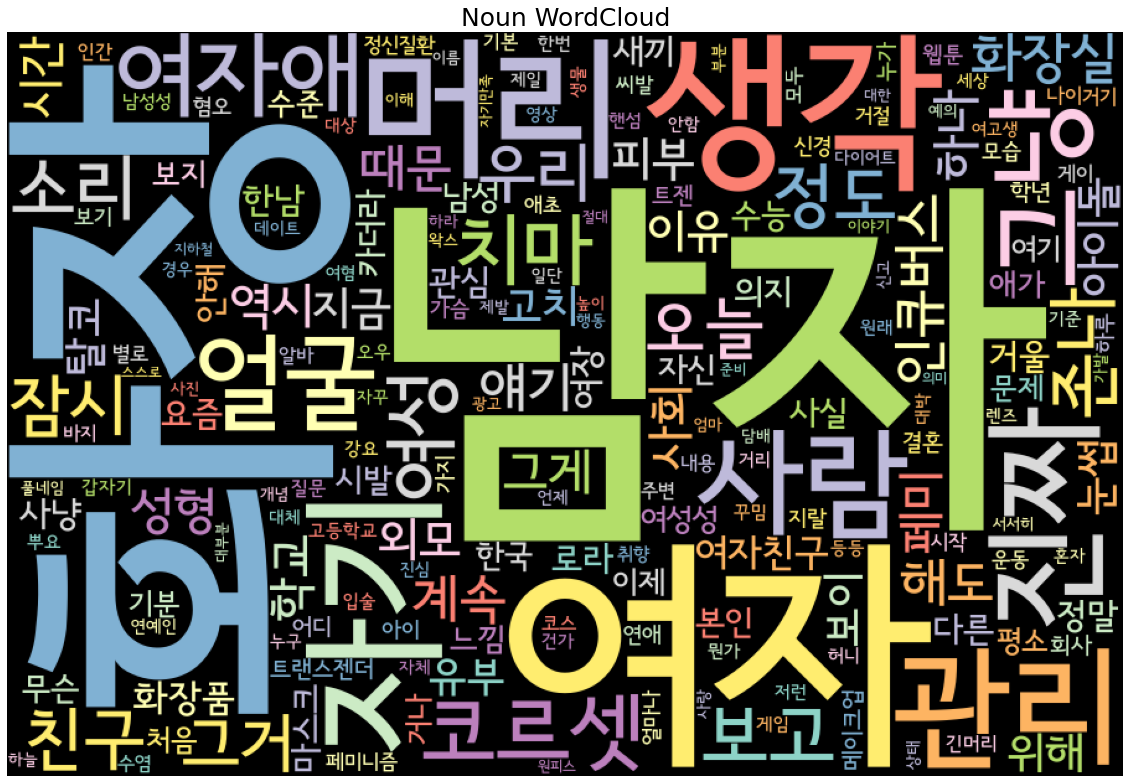

In [ ]:
# 명사 단어 빈도수와 명사 워드클라우드
negative_noun_list = []
for tweet in tagged_negative:    
    for word, tag in tweet:
        if tag in ['Noun']:
            if len(word) > 1:
              negative_noun_list.append(word)
negative_noun_counts = Counter(negative_noun_list)
negative_noun = negative_noun_counts.most_common()
print("명사 단어 빈도수")
print(negative_noun)
print("----------------------------------------------------------------")
negative_noun_cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/데저널/Week8/data/08서울남산체 B.ttf',
                  background_color='black', colormap='Set3')
negative_noun_cloud = negative_noun_cloud.fit_words(negative_noun_counts)
plt.figure(figsize=(20, 25))
plt.axis('off')
plt.title('Noun WordCloud', fontsize=25)
plt.imshow(negative_noun_cloud)
plt.show()

명사 단어 빈도수
[('좋다', 24), ('좋아', 22), ('없는', 18), ('같은', 17), ('그런', 15), ('이런', 15), ('있고', 15), ('예쁜', 14), ('좋음', 14), ('있는', 14), ('좋은', 13), ('아니', 10), ('좋고', 10), ('같아서', 9), ('어떻게', 9), ('진한', 9), ('좋아요', 9), ('철저한', 9), ('좋아하는', 9), ('같아', 8), ('입니다', 7), ('아니라', 7), ('어떤', 7), ('없고', 7), ('없는데', 6), ('예쁘고', 6), ('없음', 6), ('좋은데', 6), ('같아요', 6), ('같다', 6), ('아름다', 6), ('귀여운', 6), ('잘생긴', 5), ('어때', 5), ('있음', 5), ('아닐까', 5), ('아름다운', 5), ('좋아서', 5), ('있다', 5), ('아닌', 5), ('완벽한', 4), ('잘생기고', 4), ('멋져', 4), ('있었음', 4), ('하얀', 4), ('없다고', 4), ('많은', 4), ('예쁨', 4), ('있는데', 4), ('재밌다', 4), ('있어서', 4), ('길면', 3), ('소홀하지', 3), ('부럽', 3), ('미쳤어', 3), ('있는거', 3), ('상냥하고', 3), ('짙은', 3), ('적당히', 3), ('좋네', 3), ('아니고', 3), ('좋아한다', 3), ('같음', 3), ('좋아함', 3), ('같은거', 3), ('멋진', 3), ('싫어하는데', 3), ('젊은', 3), ('없어서', 3), ('같은데', 3), ('이쁘다', 3), ('넘치는', 3), ('예쁘게', 3), ('확실히', 3), ('좋아해', 3), ('이뻐', 3), ('예뻐', 3), ('재밌고', 3), ('없다', 3), ('여리', 3), ('진하고', 3), ('그렇고', 3), ('잘생겼다', 2), ('아름답고', 

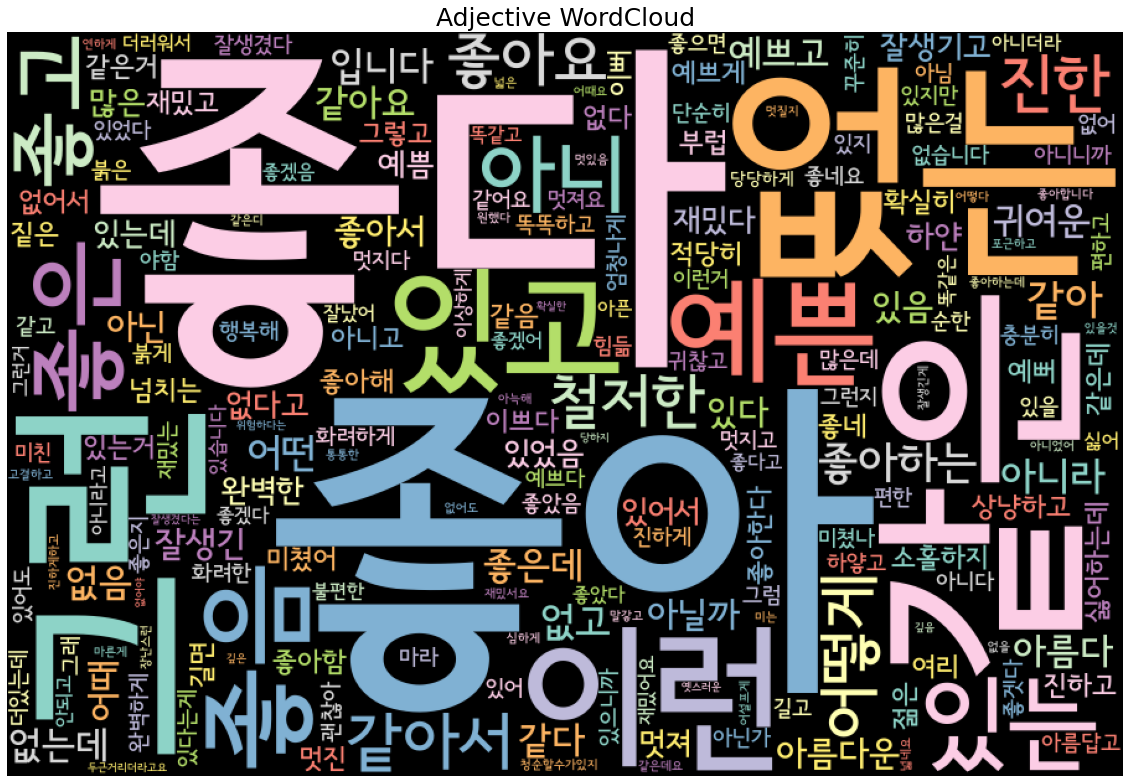

In [ ]:
# 형용사 단어 빈도수와 명사 워드클라우드
positive_adjective_list = []
for tweet in tagged_positive:    
    for word, tag in tweet:
        if tag in ['Adjective']:
            if len(word) > 1:
              positive_adjective_list.append(word)
positive_adjective_counts = Counter(positive_adjective_list)
positive_adjective = positive_adjective_counts.most_common()
print("명사 단어 빈도수")
print(positive_adjective)
print("----------------------------------------------------------------")
positive_adjective_cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/데저널/Week8/data/08서울남산체 B.ttf',
                  background_color='black', colormap='Set3')
positive_adjective_cloud = positive_adjective_cloud.fit_words(positive_adjective_counts)
plt.figure(figsize=(20, 25))
plt.axis('off')
plt.title('Adjective WordCloud', fontsize=25)
plt.imshow(positive_adjective_cloud)
plt.show()

형용사 단어 빈도수
[('아니', 72), ('같은', 50), ('이런', 40), ('그런', 38), ('아니라', 36), ('있고', 35), ('있는', 32), ('없어', 27), ('있냐', 25), ('없고', 25), ('그러고', 24), ('같은걸', 24), ('그럼', 24), ('같음', 23), ('괜찮을', 23), ('그래', 22), ('아니고', 22), ('아님', 20), ('어떻게', 20), ('좋아하는', 20), ('없는', 19), ('있음', 18), ('진한', 15), ('어떤', 15), ('예쁘게', 15), ('좋은', 15), ('같은데', 14), ('있는데', 14), ('없음', 13), ('솔직히', 13), ('아니야', 13), ('그런거', 12), ('예쁜', 12), ('같다', 12), ('잘생긴', 12), ('아니면', 11), ('없다', 11), ('입니다', 10), ('길고', 10), ('있으면', 10), ('신비한', 10), ('싫다', 10), ('좋아하고', 9), ('예쁘다는데', 9), ('진하게', 8), ('그럴', 8), ('많은', 8), ('좋다', 8), ('아닌', 8), ('많은데', 7), ('있어', 7), ('없어서', 7), ('이상한', 7), ('이쁘게', 7), ('안되는', 7), ('많고', 7), ('이런거', 7), ('아니라고', 7), ('싫은', 7), ('있어서', 7), ('같아', 7), ('있을', 7), ('있다', 7), ('있다는', 6), ('예쁘고', 6), ('좋겠다', 6), ('당연히', 6), ('다르게', 6), ('싫어하는', 6), ('싫고', 6), ('아니다', 6), ('아닌가', 6), ('빡치네', 6), ('아닌데', 6), ('이쁜', 6), ('좋아', 6), ('많음', 6), ('당연한거', 6), ('야함', 6), ('당연한', 5), ('좋아하면', 5), ('예쁘다

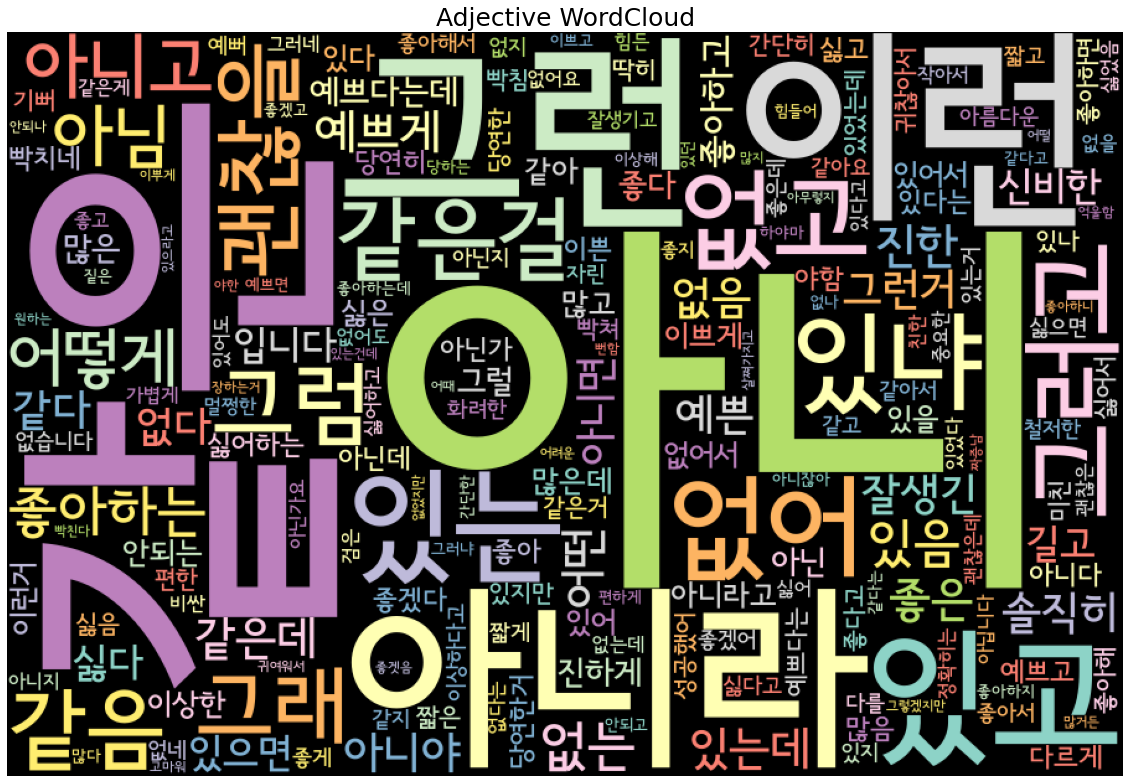

In [ ]:
# 형용사 단어 빈도수와 명사 워드클라우드
negative_adjective_list = []
for tweet in tagged_negative:    
    for word, tag in tweet:
        if tag in ['Adjective']:
            if len(word) > 1:
              negative_adjective_list.append(word)
negative_adjective_counts = Counter(negative_adjective_list)
negative_adjective = negative_adjective_counts.most_common()
print("형용사 단어 빈도수")
print(negative_adjective)
print("----------------------------------------------------------------")
negative_adjective_cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/데저널/Week8/data/08서울남산체 B.ttf',
                  background_color='black', colormap='Set3')
negative_adjective_cloud = negative_adjective_cloud.fit_words(negative_adjective_counts)
plt.figure(figsize=(20, 25))
plt.axis('off')
plt.title('Adjective WordCloud', fontsize=25)
plt.imshow(negative_adjective_cloud)
plt.show()

동사 단어 빈도수
[('하는', 107), ('지워주는', 90), ('하고', 41), ('해서', 17), ('하면', 15), ('하지', 14), ('하는데', 13), ('입고', 12), ('하면서', 12), ('보면', 12), ('나도', 11), ('하기', 10), ('했는데', 9), ('하게', 9), ('보세요', 8), ('한다', 7), ('되는', 7), ('생긴', 7), ('싶은', 7), ('보는', 7), ('않는', 6), ('보이는', 6), ('꾸미고', 6), ('지우는', 6), ('하구', 6), ('되고', 6), ('않고', 6), ('봐요', 5), ('하고요', 5), ('웃겨', 5), ('였는데', 5), ('는데', 5), ('받는', 5), ('했을', 5), ('나를', 5), ('봤는데', 5), ('하는거', 5), ('보다가', 5), ('해야', 5), ('꾸미는', 5), ('봤거든요', 4), ('만들어', 4), ('해주는', 4), ('꾸미지', 4), ('시키는', 4), ('알아서', 4), ('시켜주세요', 4), ('감사합니다', 4), ('않은', 4), ('싶어', 4), ('했다', 4), ('기르고', 4), ('보면서', 4), ('신데도', 3), ('않으', 3), ('나와요', 3), ('살아남은', 3), ('이긴한데', 3), ('해보면', 3), ('먹어', 3), ('해도', 3), ('느낄', 3), ('하자면', 3), ('찐한', 3), ('한다면', 3), ('챙겨', 3), ('덜어', 3), ('버렸다', 3), ('되지', 3), ('않을까', 3), ('한다고', 3), ('크고', 3), ('만나고', 3), ('하시는', 3), ('지우고', 3), ('보자', 3), ('나오는', 3), ('입은', 3), ('하는게', 3), ('먹고', 3), ('어울리는', 3), ('캐도', 3), ('생겨서', 3), ('합니다', 3), (

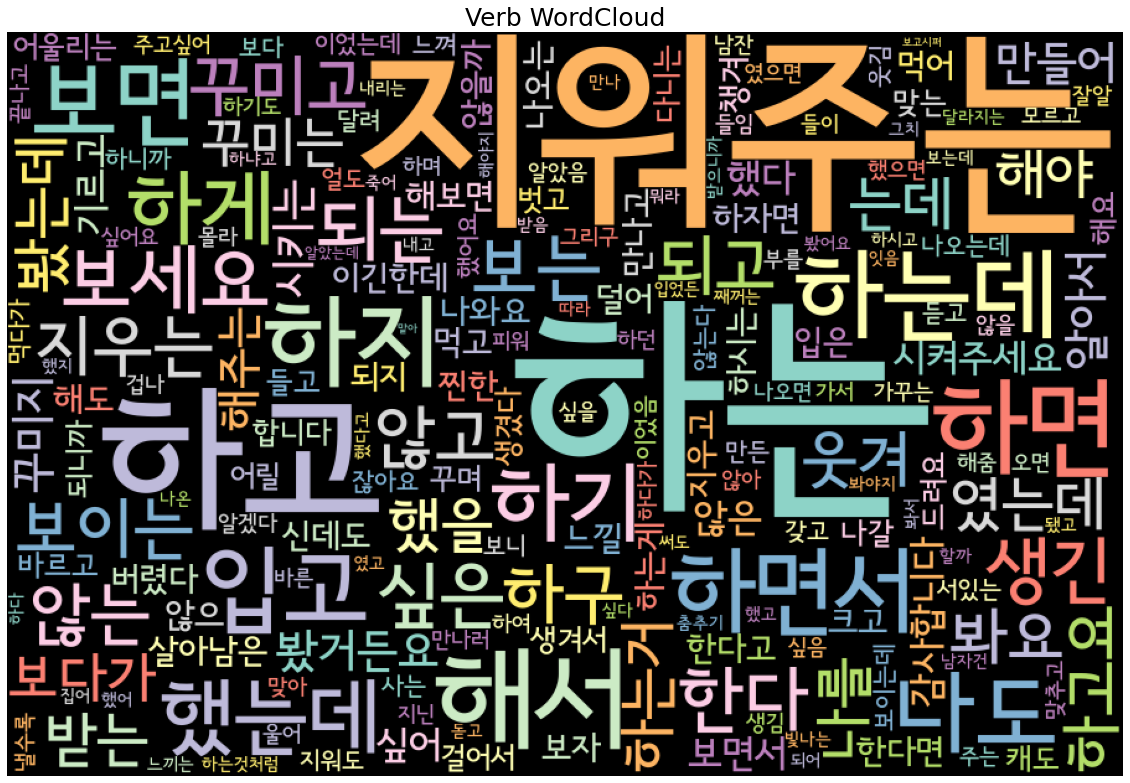

In [ ]:
# 동사 단어 빈도수와 명사 워드클라우드
positive_verb_list = []
for tweet in tagged_positive:    
    for word, tag in tweet:
        if tag in ['Verb']:
            if len(word) > 1:
              positive_verb_list.append(word)
positive_verb_counts = Counter(positive_verb_list)
positive_verb = positive_verb_counts.most_common()
print("동사 단어 빈도수")
print(positive_verb)
print("----------------------------------------------------------------")
positive_verb_cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/데저널/Week8/data/08서울남산체 B.ttf',
                  background_color='black', colormap='Set3')
positive_verb_cloud = positive_verb_cloud.fit_words(positive_verb_counts)
plt.figure(figsize=(20, 25))
plt.axis('off')
plt.title('Verb WordCloud', fontsize=25)
plt.imshow(positive_verb_cloud)
plt.show()

동사 단어 빈도수
[('하는', 233), ('하고', 140), ('하면', 95), ('입고', 75), ('해서', 70), ('지워주는', 61), ('보면', 51), ('하는데', 50), ('하면서', 49), ('하지', 41), ('하는거', 31), ('하냐고', 31), ('보일', 30), ('보는', 30), ('되는', 29), ('하기', 28), ('하는게', 27), ('했는데', 25), ('올라가는데', 25), ('했더니', 25), ('하잖아', 24), ('꾸미고', 23), ('올게요', 22), ('해보자고', 22), ('자아내면서', 22), ('걸려도', 22), ('올게', 22), ('되었어', 22), ('쓸거야', 22), ('한다', 22), ('쓰고', 20), ('해야', 19), ('생긴', 19), ('않는다', 17), ('한다고', 17), ('하게', 17), ('보니', 17), ('하던', 16), ('되지', 15), ('서야', 14), ('하다니', 13), ('입는', 13), ('봤는데', 13), ('기르고', 12), ('보이려고', 12), ('지워졌다구', 12), ('버리다니', 12), ('됐지만', 12), ('죽어줘야겠어', 12), ('가서', 12), ('봐도', 11), ('떼고', 11), ('만들고', 11), ('않고', 11), ('하니까', 11), ('다니는', 11), ('하며', 11), ('끝나자마자', 11), ('끝나면', 11), ('되고', 11), ('먹고', 10), ('않아', 10), ('기르며', 10), ('찌를듯이', 10), ('세운다', 10), ('나온', 10), ('시키고', 10), ('했다', 10), ('나오는', 9), ('나도', 9), ('만나러', 9), ('바르고', 9), ('잖아', 9), ('보면서', 9), ('씻고', 9), ('싶어', 9), ('보이는', 9), ('입은', 9), ('치워

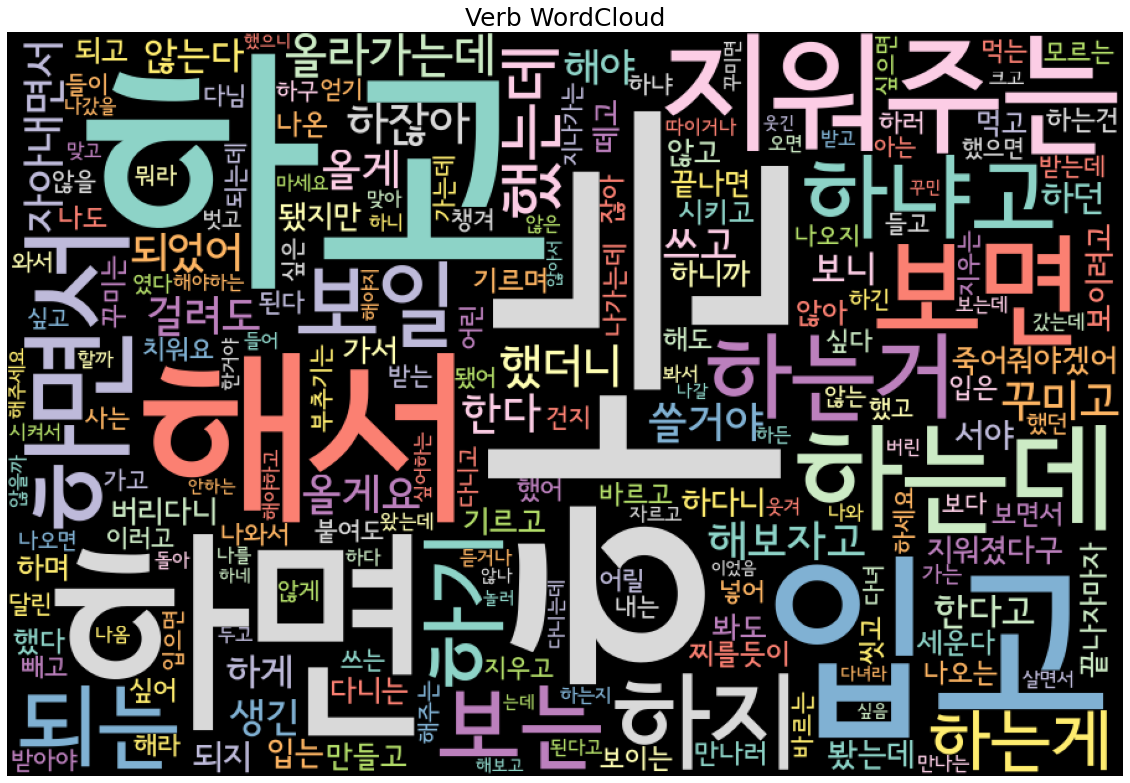

In [ ]:
# 동사 단어 빈도수와 명사 워드클라우드
negative_verb_list = []
for tweet in tagged_negative:    
    for word, tag in tweet:
        if tag in ['Verb']:
            if len(word) > 1:
              negative_verb_list.append(word)
negative_verb_counts = Counter(negative_verb_list)
negative_verb = negative_verb_counts.most_common()
print("동사 단어 빈도수")
print(negative_verb)
print("----------------------------------------------------------------")
negative_verb_cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/데저널/Week8/data/08서울남산체 B.ttf',
                  background_color='black', colormap='Set3')
negative_verb_cloud = negative_verb_cloud.fit_words(negative_verb_counts)
plt.figure(figsize=(20, 25))
plt.axis('off')
plt.title('Verb WordCloud', fontsize=25)
plt.imshow(negative_verb_cloud)
plt.show()